In [1235]:
from geometry import * # custom module used for MRE data creation and visualization
from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
from math import ceil
from sklearn.cluster import DBSCAN, KMeans
from shapely.geometry import MultiPolygon, MultiPoint
from scipy.spatial import cKDTree
import warnings
warnings.filterwarnings('ignore')

# <a id='toc1_'></a>[I. MRE (Minimum Reproducible Example) Data](#toc0_)
Place boundaries represent locally dense urban areas. Boundaries will be used initally as a proxy for regional parcel density where adaptive eps will be calcualted. 

In [1236]:
county1 = mPolygon(origin=(0,0), size=(60,50), alpha=0, edgecolor='red', linestyle='--')

In [1237]:
place1 = mPolygon(origin=(0, 0), size=(20, 20))
place2 = mPolygon(origin=(0, 22), size=(20, 20))
place3 = mPolygon(origin=(40, 0), size=(10, 45))
places = [place1, place2, place3]

place_data = {
    'Place': ['P1', 'P2', 'P3']
}
place_gdf = GeoDataFrame(place_data, places).build()
place_gdf

,Place,geometry
0,P1,"POLYGON ((0 0, 20 0, 20 20, 0 20, 0 0))"
1,P2,"POLYGON ((0 22, 20 22, 20 42, 0 42, 0 22))"
2,P3,"POLYGON ((40 0, 50 0, 50 45, 40 45, 40 0))"


In [1238]:
map = Map()

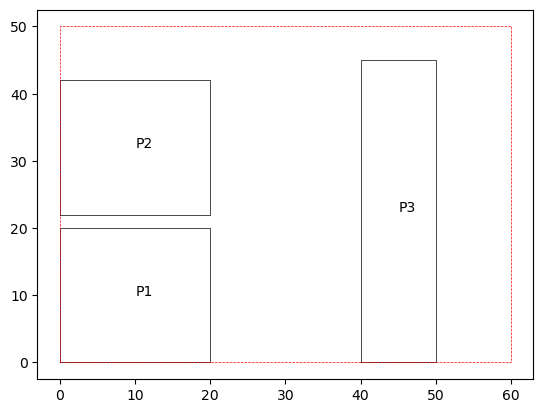

In [1239]:
map.add_gdf(place_gdf, label='Place', alpha=0)
map.add_shape(county1)
map.plot()

### <a id='toc1_1_1_'></a>[Places 1 Parcel Data](#toc0_)

In [1240]:
# bottom left set
p1_1 = mPolygon(origin=(0, 0), size=(2,2))
p1_2 = mPolygon(origin=(0,2), size=(2,2))
p1_3 = mPolygon(origin=(0,4), size=(2,2)) # -
p1_4 = mPolygon(origin=(0,6), size=(2,2)) # -
p1_5 = mPolygon(origin=(0,8), size=(2,2))
p1_6 = mPolygon(origin=(2,0), size=(2,2))
p1_7 = mPolygon(origin=(2,2), size=(2,2))
p1_8 = mPolygon(origin=(2,4), size=(2,2)) # -
p1_9 = mPolygon(origin=(2,6), size=(2,2)) # -
p1_10 = mPolygon(origin=(2,8), size=(2,2))  # -

# Bottom right set
p1_11 = mPolygon(origin=(8,0), size=(2,2))
p1_12 = mPolygon(origin=(8,2), size=(2,2))
p1_13 = mPolygon(origin=(8,4), size=(2,2))
p1_14 = mPolygon(origin=(8,6), size=(2,2))
p1_15 = mPolygon(origin=(8,8), size=(2,2))
p1_16 = mPolygon(origin=(10,0), size=(2,2))
p1_17 = mPolygon(origin=(10,2), size=(2,2))
p1_18 = mPolygon(origin=(10,4), size=(2,2))
p1_19 = mPolygon(origin=(10,6), size=(2,2))
p1_20 = mPolygon(origin=(10,8), size=(2,2))

# top E
p1_21 = mPolygon(origin=(0,12), size=(2,2))
p1_22 = mPolygon(origin=(0,14), size=(2,2))
p1_23 = mPolygon(origin=(0,16), size=(2,2))
p1_24 = mPolygon(origin=(0,18), size=(2,2))
p1_25 = mPolygon(origin=(2,12), size=(2,2))
p1_26 = mPolygon(origin=(2,14), size=(2,2))
p1_27 = mPolygon(origin=(2,16), size=(2,2))
p1_28 = mPolygon(origin=(2,18), size=(2,2))

# top right
p1_29 = mPolygon(origin=(8,12), size=(2,2))
p1_30 = mPolygon(origin=(8,14), size=(2,2))
p1_31 = mPolygon(origin=(8,16), size=(2,2))
p1_32 = mPolygon(origin=(8,18), size=(2,2))
p1_33 = mPolygon(origin=(10,12), size=(2,2))
p1_34 = mPolygon(origin=(10,14), size=(2,2))
p1_35 = mPolygon(origin=(10,16), size=(2,2))
p1_36 = mPolygon(origin=(10,18), size=(2,2))


p1_parcels = [
    p1_1, p1_2, p1_3, p1_4, p1_5, p1_6, p1_7, p1_8, p1_9, p1_10, p1_11, p1_12, p1_13, p1_14, p1_15, p1_16, 
    p1_17, p1_18, p1_19, p1_20, p1_21, p1_22, p1_23, p1_24, p1_25, p1_26, p1_27, p1_28,
    p1_29, p1_30, p1_31, p1_32, p1_33, p1_34, p1_35, p1_36
]

p1_parcel_data = {
    'OWNER': ['D', 'D', '-', '-', 'E', 'A', 'D', '-', '-', '-', 
    'A', 'D', 'D', 'C', 'F', 'B', 'B', 'C', 'F', 'F',
    '-', '-', 'E', 'E', '-', '-', 'E', 'E',
    'F', '-', '-', 'F', 'F', 'F', 'F', 'F'],
}
p1_parcel_gdf = GeoDataFrame(p1_parcel_data, p1_parcels).build()

# add line to map
#p1_line = mLine(coords=[(5, 0), (5, 10)], color='black')



In [1241]:
map.add_gdf(p1_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

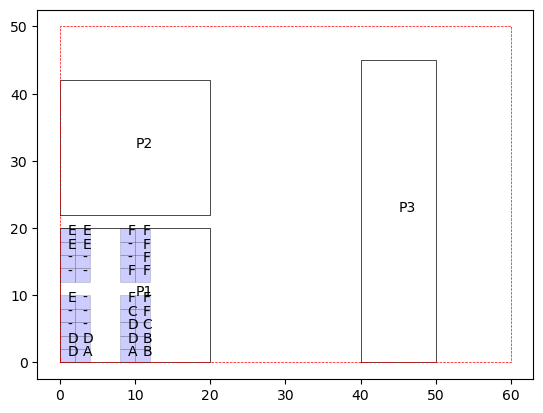

In [1242]:
map.plot()

### <a id='toc1_1_2_'></a>[Places 2 Parcel Data](#toc0_)

In [1243]:
p2_1 = mPolygon(origin=(0, 22), size=(2,2))
p2_2 = mPolygon(origin=(0,24), size=(2,2))
p2_3 = mPolygon(origin=(0,26), size=(2,2))
p2_4 = mPolygon(origin=(0,28), size=(2,2))
p2_5 = mPolygon(origin=(0,30), size=(2,2))
p2_6 = mPolygon(origin=(2,22), size=(2,2))
p2_7 = mPolygon(origin=(2,24), size=(2,2))
p2_8 = mPolygon(origin=(2,26), size=(2,2))
p2_9 = mPolygon(origin=(2,28), size=(2,2))
p2_10 = mPolygon(origin=(2,30), size=(2,2))

p2_11 = mPolygon(origin=(8,22), size=(2,2))
p2_12 = mPolygon(origin=(8,24), size=(2,2))
p2_13 = mPolygon(origin=(8,26), size=(2,2))
p2_14 = mPolygon(origin=(8,28), size=(2,2))
p2_15 = mPolygon(origin=(8,30), size=(2,2))
p2_16 = mPolygon(origin=(10,22), size=(2,2))
p2_17 = mPolygon(origin=(10,24), size=(2,2))
p2_18 = mPolygon(origin=(10,26), size=(2,2))
p2_19 = mPolygon(origin=(10,28), size=(2,2))
p2_20 = mPolygon(origin=(10,30), size=(2,2))

p2_21 = mPolygon(origin=(16,22), size=(2,2))
p2_22 = mPolygon(origin=(16,24), size=(2,2))
p2_23 = mPolygon(origin=(18,22), size=(2,2))
p2_24 = mPolygon(origin=(18,24), size=(2,2))


p2_parcels = [p2_1, p2_2, p2_3, p2_4, p2_5, p2_6, p2_7, p2_8, p2_9, p2_10, 
p2_11, p2_12, p2_13, p2_14, p2_15, p2_16, p2_17, p2_18, p2_19, p2_20,
p2_21, p2_22, p2_23, p2_24
]

p2_parcel_data = {
    'OWNER': ['E', '-', '-', '-', 'E', 'E', '-', 'F', 'F', 'D',
    'F', 'F', 'C', 'C', 'C', 'F', '-', '-', '-', '-',
    '-', '-', '-', '-'
    ]
}
p2_parcel_gdf = GeoDataFrame(p2_parcel_data, p2_parcels).build()

# add line to map
#p2_line = mLine(coords=[(5, 12), (5, 22)], color='black')


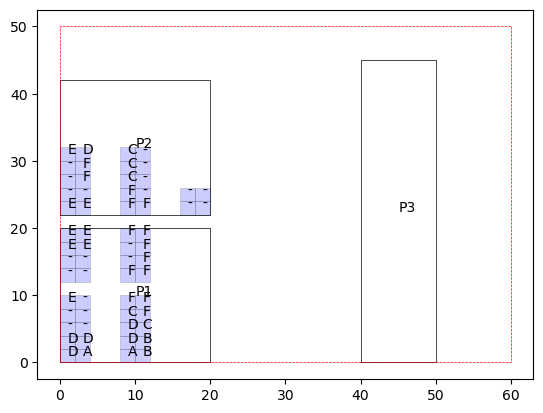

In [1244]:
map.add_gdf(p2_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

map.plot()

### <a id='toc1_1_3_'></a>[Place 3 Parcel Data](#toc0_)

In [1245]:
p3_1 = mPolygon(origin=(40, 0), size=(2,2))
p3_2 = mPolygon(origin=(40,2), size=(2,2))
p3_3 = mPolygon(origin=(40,4), size=(2,2)) # -
p3_4 = mPolygon(origin=(40,6), size=(2,2)) # -

p3_5 = mPolygon(origin=(42,0), size=(2,2))
p3_6 = mPolygon(origin=(42,2), size=(2,2))
p3_7 = mPolygon(origin=(42,4), size=(2,2))
p3_8 = mPolygon(origin=(42,6), size=(2,2))

p3_9 = mPolygon(origin=(40,16), size=(2,2))
p3_10 = mPolygon(origin=(40,18), size=(2,2))
p3_11 = mPolygon(origin=(40,20), size=(2,2))
p3_12 = mPolygon(origin=(40,22), size=(2,2))

p3_13 = mPolygon(origin=(42,16), size=(2,2)) # -
p3_14 = mPolygon(origin=(42,18), size=(2,2)) # -
p3_15 = mPolygon(origin=(42,20), size=(2,2))
p3_16 = mPolygon(origin=(42,22), size=(2,2))

p3_17 = mPolygon(origin=(40,32), size=(2,2))
p3_18 = mPolygon(origin=(40,34), size=(2,2))
p3_19 = mPolygon(origin=(46,36), size=(2,2))
p3_20 = mPolygon(origin=(46,38), size=(2,2))

p3_21 = mPolygon(origin=(42,32), size=(2,2))
p3_22 = mPolygon(origin=(42,34), size=(2,2))
p3_23 = mPolygon(origin=(48,36), size=(2,2))
p3_24 = mPolygon(origin=(48,38), size=(2,2))

p3_25 = mPolygon(origin=(48,30), size=(2,2)) # f
p3_26 = mPolygon(origin=(48,34), size=(2,2)) # f
p3_27 = mPolygon(origin=(48,12), size=(2,2)) # f
p3_28 = mPolygon(origin=(48,16), size=(2,2)) # f






p3_parcels = [
    p3_1, p3_2, p3_3, p3_4, p3_5, p3_6, p3_7, p3_8, p3_9, p3_10, p3_11, p3_12, p3_13, p3_14, p3_15, p3_16,
    p3_17, p3_18, p3_19, p3_20, p3_21, p3_22, p3_23, p3_24, p3_25, p3_26, p3_27, p3_28
]

p3_parcel_data = {
    'OWNER': ['A', 'A', '-', '-', 'A', 'A', 'C', 'C', 'A', 'A', '-', '-', '-', 'E', 'F', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'F', '-', '-', 'F']
}
p3_parcel_gdf = GeoDataFrame(p3_parcel_data, p3_parcels).build()

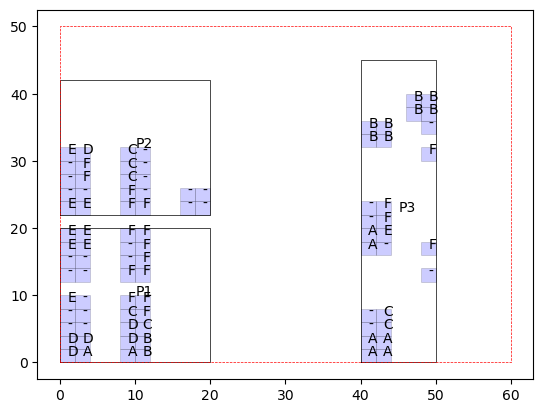

In [1246]:
map.add_gdf(p3_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

map.plot()

### Rural Parcel Data

In [1247]:


pr_1 = mPolygon(origin=(34,8), size=(2,2))
pr_2 = mPolygon(origin=(34,10), size=(2,2))
pr_3 = mPolygon(origin=(34,12), size=(2,2))
pr_4 = mPolygon(origin=(34,14), size=(2,2))

pr_5 = mPolygon(origin=(36,8), size=(2,2))
pr_6 = mPolygon(origin=(36,10), size=(2,2))
pr_7 = mPolygon(origin=(36,12), size=(2,2))
pr_8 = mPolygon(origin=(36,14), size=(2,2))

pr_9 = mPolygon(origin=(26,24), size=(2,2)) # B
pr_10 = mPolygon(origin=(26,26), size=(2,2)) # B
pr_11 = mPolygon(origin=(28,24), size=(2,2)) # B
pr_12 = mPolygon(origin=(28,26), size=(2,2)) # B

pr_13 = mPolygon(origin=(38,0), size=(2,2)) # A
pr_14 = mPolygon(origin=(38,2), size=(2,2)) # A

pr_15 = mPolygon(origin=(24,12), size=(2,2)) # B
pr_16 = mPolygon(origin=(24,16), size=(2,2)) # B
pr_17 = mPolygon(origin=(26,12), size=(2,2)) # B
pr_18 = mPolygon(origin=(26,16), size=(2,2)) # B





pr_parcels = [
    pr_1, pr_2, pr_3, pr_4, pr_5, pr_6, pr_7, pr_8, pr_9, pr_10, pr_11, pr_12, pr_13, pr_14, pr_15, pr_16, pr_17, pr_18
]

pr_parcel_data = {
    'OWNER': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B']
}
pr_parcel_gdf = GeoDataFrame(pr_parcel_data, pr_parcels).build()

map.add_gdf(pr_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

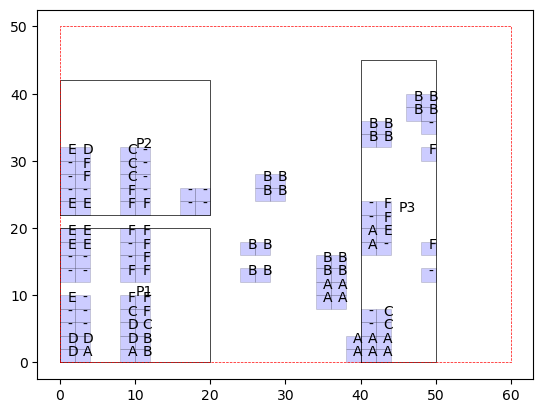

In [1248]:
map.plot()

In [1249]:
parcels = pd.concat([p1_parcel_gdf, p2_parcel_gdf, p3_parcel_gdf, pr_parcel_gdf], ignore_index=True)

# <a id='toc2_'></a>[II. Clustering](#toc0_)

### <a id='toc2_1_1_'></a>[Clustering Functions](#toc0_)

In [1250]:
from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
from math import ceil
from sklearn.cluster import DBSCAN, KMeans
from shapely.geometry import MultiPolygon, MultiPoint
from scipy.spatial import cKDTree
from scipy.spatial.distance import cdist

from typing import List

""" Functions for KMeans clustering """
def build_place_regions(df, max_parcels_per_cluster):
    """
    Assigns each parcel to a region based on Kmeans clustering.
    Returns a list of region assignments.
    """

    # number of clustrs is proportional to the number of parcels
    nclusters = len(df) // max_parcels_per_cluster
    
    coords = build_coords(df)

    labels, centroids = build_kmeans_clusters(nclusters, coords)
    return labels, centroids

def build_kmeans_clusters(n_clusters, coords):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(coords)  
    centroids = kmeans.cluster_centers_

    return labels, centroids


def build_coords(df):
    return list(zip(df.centroid.x, df.centroid.y))

""" Functions for KNN distance calculation """
def calculate_regional_knn_distance(
            coords, 
            kneighbors, 
            smoothing_window, 
            min_distance, 
            max_distance
        ):
    """
    Calculates the optimal distance for DBSCAN clustering. 
    """
    knn_distances = build_knn_distances(coords, k=kneighbors + 1)
    kth_distances = get_kth_distances(knn_distances)
    smoothed_distances = smooth_distances(kth_distances, window=smoothing_window)
    if len(smoothed_distances) <= 2:
        print('Warning: Not enough data to calculate optimal distance. Check input data.')
        return 1
    diff = build_difference(smoothed_distances)
    second_diff = build_difference(diff)
    knn_optimal_distance = calculate_knn_optimal_distance(smoothed_distances, second_diff)

    # optimal distance is between min and max distance
    #return min(max(ceil(knn_optimal_distance), min_distance), max_distance)
    return knn_optimal_distance

def build_knn_distances(coords, k):
    """
    Builds a distance matrix between each parcel and its 1 to kth nearest neighbor.
    Returns a 2d array where each row is a parcel and each column 
    is the distance to itself then 1st, 2nd, ..., kth nearest neighbor.
    """
    dtree = cKDTree(coords) # KDTree for nearest neighbor

    # distances between each parcel and its 1 to kth nearest neighbor
    knn_distances, _ = dtree.query(coords, k=k + 1) # +1 to include distance to itself

    return knn_distances



def get_kth_distances(knn_distances):
    """
    Firsts changes inf to 0, then returns the kth nearest neighbor distance for each parcel.
    Returns the kth nearest neighbor distance for each parcel.
    """
    return np.nan_to_num(knn_distances[:, -1])
    
def smooth_distances(distances, window):
    """
    Smooths distances to reduce noise and make the elbow more apparent.
    Window is size of moving average. 
    """
    return uniform_filter1d(distances, size=ceil(window * len(distances)))

def build_difference(distances):
    """
    Builds the difference between each distance and the next.
    """
    return np.diff(distances)


def calculate_knn_optimal_distance(distances, diff_array):
    """
    Finds the elbow point in the difference array.
    returns the index of the elbow point in the difference array. 
    1 is added to the index to get the kth distance.
    Index is then used to get the optimal distance from a sorted array of distances.
    """
    elbow_index = np.argmax(diff_array) + 1
    knn_dist = distances[elbow_index]
    if knn_dist == np.inf:
        return 1
    if knn_dist <= 0:
        return 1

       
    
    return knn_dist

def merge_small_clusters(labels, centroids, min_cluster_size):
    """
    Merges small clusters into larger clusters.
    Returns the new cluster labels.
    """

    # Step 1: Identify Small Clusters
    cluster_sizes = np.bincount(labels)
    
    small_clusters = np.where(cluster_sizes < min_cluster_size)[0]

    # Step 2: Merge Small Clusters
    for small_cluster in small_clusters:
        small_cluster_indices = np.where(labels == small_cluster)[0]
        small_cluster_centroid = centroids[small_cluster]

        # Find the nearest larger cluster
        other_clusters = [i for i in range(len(centroids)) if i != small_cluster]
        distances = cdist([small_cluster_centroid], centroids[other_clusters], metric='euclidean')
        nearest_cluster = other_clusters[np.argmin(distances)]

        # Reassign small cluster points to the nearest cluster
        labels[small_cluster_indices] = nearest_cluster
    
    return labels




        

""" Functions for DBSCAN clustering """

def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

def add_attributes(df, **kwargs):
    for key, value in kwargs.items():
        df[key] = value
    return df

def build_owner_clusters(df, min_samples, eps):
    """
    Builds clusters for a same-owner parcels within a region.
    DBSCAN is used to cluster parcels based on their distance
    using the calculated regional optimal distance. 
    """
    polygons = df.geometry.to_list()

    distance_matrix = compute_distance_matrix(polygons)

    if distance_matrix.shape[0] < 3: # only two parcels
        ##print('Only two parcels in region. No clustering performed.')
        dbscan = np.array([]) # no clustering
        return dbscan
    else:
        return build_dbscan_clusters(distance_matrix, min_samples, eps)

def build_dbscan_clusters(dmatrix, min_samples, eps):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    return dbscan.fit_predict(dmatrix)

def segregate_outliers(value_counts, outlier_value):
    """
    Identifies outliers in a cluster based on the cluster ID.
    Returns a list of outlier cluster Indicies and 
    removes them from the cluster counts.
    """
    
    outliers = value_counts[value_counts.index == outlier_value].index
    outliers = set(list(outliers)) # remove duplicates
    new_counts = value_counts[value_counts.index != -1] # drop outliers
    return outliers, new_counts

            
def remove_from_df(df, list_of_ids: List[int], field: str):
    """
    removes rows from a dataframe based on a list of IDs.
    """
    return df[~df[field].isin(list_of_ids)]  

def locate_in_df(df, list_of_ids: List[int], field: str):
    """
    locates rows in a dataframe based on a list of IDs.
    """
    return df[df[field].isin(list_of_ids)]


def generate_cluster_string(List:[str]) -> List[str]:
    """
    Generates and assigns cluster IDs field to df. Returns df with cluster_ID field.
    """
    cluster_string = '-'.join(List)
    return cluster_string


""" Funcitons to Merge """
def merge_cross_region_clusters(df, max_merge_distance=4):
    # Step 1: Identify owners spanning multiple regions
    owner_region_count = df.groupby(['OWNER', 'place_id']).size().unstack(fill_value=0)
    print(owner_region_count)
    multi_region_owners = owner_region_count[owner_region_count.sum(axis=1) > 1].index
    print(multi_region_owners)

    # Step 2: For each multi-region owner, check distances between clusters
    for owner in multi_region_owners:
        
        owner_df = df[df['OWNER'] == owner]
        
        # Extract centroids for each cluster of the owner
        centroids = owner_df.geometry.centroid
        coords = list(zip(centroids.x, centroids.y))

        # Build a KDTree for fast distance lookup
        tree = cKDTree(coords)

        # Find pairs of clusters within the max_merge_distance
        pairs = tree.query_pairs(max_merge_distance)
        
        # Merge clusters if they are close enough
        for i, j in pairs:
            cluster_i = owner_df.iloc[i]['cluster_ID']
            cluster_j = owner_df.iloc[j]['cluster_ID']

            # Update cluster_ID to merge them
            df.loc[df['cluster_ID'] == cluster_j, 'cluster_ID'] = cluster_i

    return df

   

### <a id='toc2_1_2_'></a>[Workflow](#toc0_)

In [1251]:
max_parcels_per_cluster = 8 # maximum number of parcels per Kmeans cluster
kneighbors = 3 # number of nearest neighbors to consider for optimal distance calculation
min_cluster_size = 3 # minimum number of parcels required to form a DBSCAN cluster
max_urban_distance = 5 # max. distance between two likely neighbors
rural_distance = 10 # distance between two parcels in a rural area
smoothing_window = 0.5 # 50% of the distance data is used for smoothing (i.e. 50% of the data is used for the window)
min_urban_distance = 1 # minimum distance between two parcels in an urban area



In [1252]:
cc_parcels = parcels[parcels['OWNER'] != '-']
cc_parcels['OWNER'].value_counts()

OWNER
B    22
F    18
A    14
E     9
C     7
D     6
Name: count, dtype: int64

In [1254]:

all_clustered_parcel_data = gpd.GeoDataFrame()
all_single_parcel_data = gpd.GeoDataFrame()
for place_id, place_data in place_gdf.iterrows():
    place_id += 1
    #if place_id == 3:
    #    continue
    print(f"Processing place {place_id}")
    sub_parcels = parcels[parcels.within(place_data['geometry'])]

    regions, region_centroids = build_place_regions(sub_parcels, max_parcels_per_cluster)
    print(f"Number of regions: {len(set(regions))}")
    merged_regions = merge_small_clusters(
        regions,
        region_centroids,
        kneighbors + 1
    )
    print(f"Number of merged regions: {len(set(merged_regions))}")
    
    sub_parcels['regions'] = merged_regions
    sub_parcels['regions'] = sub_parcels['regions'].astype(str)
    
    #sub_parcel_map.add_gdf(sub_parcels, label='regions', alpha=0.2, color='blue')
    all_regional_parcels = gpd.GeoDataFrame()
    for region in sub_parcels['regions'].unique():
        print('________________________________')
        print(f"Processing region {region}")
        clustered_parcel_data = gpd.GeoDataFrame()
        single_parcel_data = gpd.GeoDataFrame()
        
        regional_parcels = sub_parcels[sub_parcels['regions'] == region]
        regional_cc_parcels = cc_parcels[cc_parcels.intersects(regional_parcels.unary_union)]

        region_coords = build_coords(regional_parcels)
        
        regional_singles = []
        if len(regional_parcels) == 1:
            regional_singles.append(regional_parcels)
            continue

        knn_optimal_distance = calculate_regional_knn_distance(
            coords=region_coords,
            kneighbors=kneighbors,
            smoothing_window=smoothing_window,
            min_distance=min_urban_distance,
            max_distance=max_urban_distance
        )
        
        print(f"Optimal distance for Place {place_id}, Region {region}: {knn_optimal_distance}")
        
        unique_owners = regional_parcels['OWNER'].unique()
        for owner in unique_owners:
            print(f"Processing owner {owner}")
            owner_parcels = regional_cc_parcels[regional_cc_parcels['OWNER'] == owner]
                     
            clusters = build_owner_clusters(
                owner_parcels,
                min_samples=min_cluster_size,
                eps=knn_optimal_distance
            )
            
            if len(clusters) == 0: # EMPTY: NO CLUSTERS
                print(f'Owner {owner} has less than 2 parcels')
                single_parcel_data = pd.concat([single_parcel_data, owner_parcels], ignore_index=True)  
                single_parcel_data = add_attributes(
                    single_parcel_data,
                    place_id=place_id,
                    )
                continue

            owner_parcels['cluster'] = clusters # cluster ID
            owner_parcels['area'] = owner_parcels['geometry'].area
            counts = owner_parcels['cluster'].value_counts() # pd.series of cluster counts

            outlier_ids, clean_counts = segregate_outliers(counts, -1)

            add_to_singles = locate_in_df(owner_parcels, outlier_ids, 'cluster')
            add_to_singles = add_to_singles.drop(columns=['cluster', 'area'])
            single_parcel_data = pd.concat([single_parcel_data, add_to_singles], ignore_index=True)

            if len(single_parcel_data) > 0:
                single_parcel_data = add_attributes(
                    single_parcel_data,
                    place_id=place_id,
                )
            
            
            cluster_filter = remove_from_df(owner_parcels, outlier_ids, 'cluster')
            if len(cluster_filter) > 0:
                cluster_filter = add_attributes(
                    cluster_filter,
                    pcount=cluster_filter['cluster'].map(counts),
                    knn_dst=knn_optimal_distance,
                    place_id=place_id
                )
                clustered_parcel_data = pd.concat([clustered_parcel_data, cluster_filter], ignore_index=True)
           
        # create cluster ID
        if len(clustered_parcel_data) != 0:
            cluster_string = generate_cluster_string([str(place_id), str(region)])
            
            clustered_parcel_data['cluster_ID'] = (
                clustered_parcel_data['OWNER'] + '_' +
                cluster_string + '_' + 
                clustered_parcel_data['cluster'].astype(str)
            )

        if len(single_parcel_data) != 0:
            cluster_string = generate_cluster_string([str(place_id), str(region), 'X'])

            single_parcel_data['cluster_ID'] = (
                single_parcel_data['OWNER'] + '_' +
                cluster_string
            )
        print('________________________________')
                
        all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, clustered_parcel_data], ignore_index=True)
        all_single_parcel_data = pd.concat([all_single_parcel_data, single_parcel_data], ignore_index=True)

    

Processing place 1
Number of regions: 4
Number of merged regions: 4
________________________________
Processing region 2
Optimal distance for Place 1, Region 2: 3.2970562748477144
Processing owner D
Processing owner -
Owner - has less than 2 parcels
Processing owner E
Owner E has less than 2 parcels
Processing owner A
Owner A has less than 2 parcels
________________________________
________________________________
Processing region 0
Optimal distance for Place 1, Region 0: 3.2970562748477144
Processing owner A
Owner A has less than 2 parcels
Processing owner D
Owner D has less than 2 parcels
Processing owner C
Owner C has less than 2 parcels
Processing owner F
Processing owner B
Owner B has less than 2 parcels
________________________________
________________________________
Processing region 1
Optimal distance for Place 1, Region 1: 3.414213562373095
Processing owner -
Owner - has less than 2 parcels
Processing owner E
________________________________
________________________________


In [1255]:
all_clustered_parcel_data

,OWNER,geometry,cluster,area,pcount,knn_dst,place_id,cluster_ID
0,D,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))",0,4.0,3,3.297056,1,D_1-2_0
1,D,"POLYGON ((0 2, 2 2, 2 4, 0 4, 0 2))",0,4.0,3,3.297056,1,D_1-2_0
2,D,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))",0,4.0,3,3.297056,1,D_1-2_0
3,F,"POLYGON ((8 8, 10 8, 10 10, 8 10, 8 8))",0,4.0,3,3.297056,1,F_1-0_0
4,F,"POLYGON ((10 6, 12 6, 12 8, 10 8, 10 6))",0,4.0,3,3.297056,1,F_1-0_0
5,F,"POLYGON ((10 8, 12 8, 12 10, 10 10, 10 8))",0,4.0,3,3.297056,1,F_1-0_0
6,E,"POLYGON ((0 16, 2 16, 2 18, 0 18, 0 16))",0,4.0,4,3.414214,1,E_1-1_0
7,E,"POLYGON ((0 18, 2 18, 2 20, 0 20, 0 18))",0,4.0,4,3.414214,1,E_1-1_0
8,E,"POLYGON ((2 16, 4 16, 4 18, 2 18, 2 16))",0,4.0,4,3.414214,1,E_1-1_0
9,E,"POLYGON ((2 18, 4 18, 4 20, 2 20, 2 18))",0,4.0,4,3.414214,1,E_1-1_0


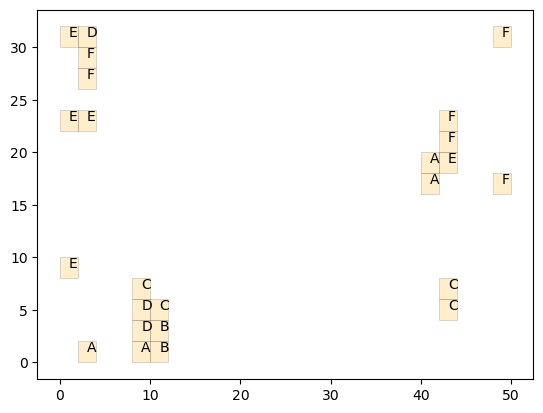

In [1256]:
single_parcel_map = Map()
single_parcel_map.add_gdf(all_single_parcel_data, label='OWNER', alpha=0.2, color='orange')
single_parcel_map.plot()

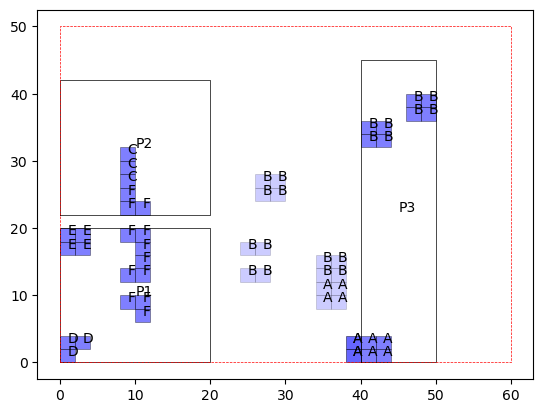

In [1257]:
map.remove(p1_parcel_gdf)
map.remove(p2_parcel_gdf)
map.remove(p3_parcel_gdf)
map.add_gdf(all_clustered_parcel_data, label='OWNER')
map.plot()

# <a id='toc3_'></a>[III. First Super Parcel Creation](#toc0_)

In [1258]:
parcel_dissolve = all_clustered_parcel_data.dissolve(by='cluster_ID').reset_index()

In [1259]:
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(x['knn_dst']), axis=1)
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(-x['knn_dst']), axis=1)
parcel_dissolve = parcel_dissolve.explode(index_parts=True)


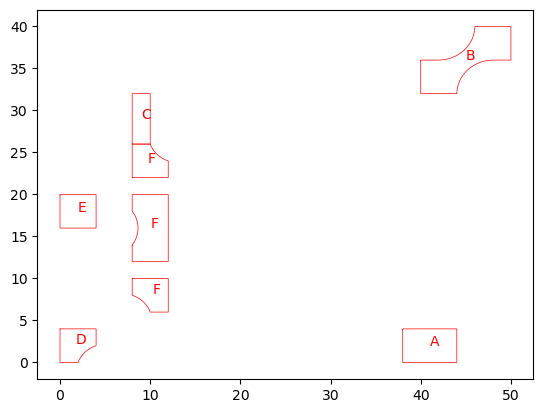

In [1260]:
cluster_map = Map()
cluster_map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')
cluster_map.plot()

In [1261]:
map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')

In [1262]:
map.add_gdf(all_single_parcel_data, label='OWNER', color='green')

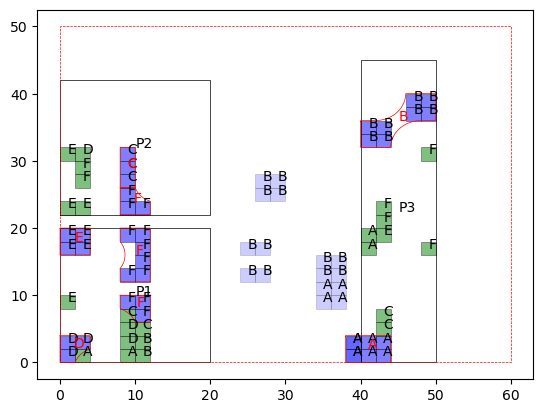

In [1263]:
map.plot()

# <a id='toc4_'></a>[IV. Merging](#toc0_)

### <a id='toc4_1_1_'></a>[Single Parcel Merging](#toc0_)

In [1264]:
all_clustered_parcel_data = all_clustered_parcel_data.reset_index(drop=False)
all_single_parcel_data = all_single_parcel_data.reset_index(drop=False)

In [1265]:
for single_id, single_data in all_single_parcel_data.iterrows():
    
    owner = single_data['OWNER']
   
    
    
    same_owner_n = all_clustered_parcel_data[(all_clustered_parcel_data['OWNER'] == owner)]
    
    if same_owner_n.empty:
        continue
    same_owner_n['cross_dist'] = same_owner_n['geometry'].apply(lambda x: polygon_distance(x, single_data['geometry']))
    same_owner_nclusters = same_owner_n.loc[same_owner_n['cross_dist'] <= 3]
    
    
    if same_owner_nclusters.empty:
        continue
    print('Adding Owner: ', owner)
    same_owner_ncluster = same_owner_nclusters.loc[same_owner_nclusters['cross_dist'].idxmin(), 'cluster_ID']
   
    add_single = all_single_parcel_data[all_single_parcel_data.index == single_id][['OWNER', 'geometry']]
    merge_n = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] == same_owner_ncluster]
    all_clustered_parcel_data = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] != same_owner_ncluster]

    
    same_owner_merge = pd.concat([merge_n, add_single], ignore_index=True)
    new_row_index = same_owner_merge.index[-1]
    source_row_index = same_owner_merge.index[0]
    for col in same_owner_merge.columns:
        if col != 'geometry':  # Skip the geometry field
            same_owner_merge.at[new_row_index, col] = same_owner_merge.at[source_row_index, col]

    all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, same_owner_merge], ignore_index=True)
    

    
    
    
    

Adding Owner:  E
Adding Owner:  E


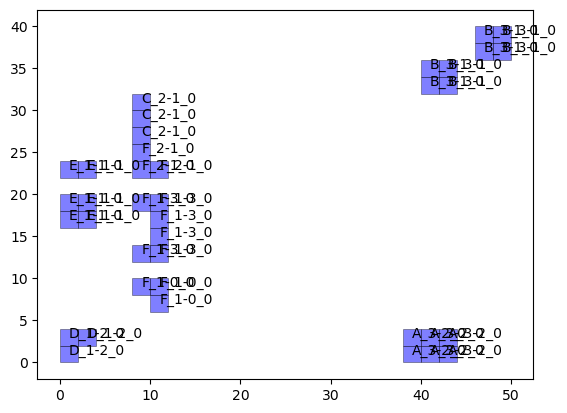

In [1266]:
new_map = Map()
new_map.add_gdf(all_clustered_parcel_data, label='cluster_ID', color='blue')
new_map.plot()

### <a id='toc4_1_2_'></a>[Same Owner Cluster Merging](#toc0_)

In [1267]:
all_clustered_parcel_data_merged = merge_cross_region_clusters(all_clustered_parcel_data)

place_id  1.0  2.0  3.0
OWNER                  
A           0    0    6
B           0    0    8
C           0    3    0
D           3    0    0
E           6    0    0
F           9    3    0
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', name='OWNER')


In [1268]:
parcel_dissolve_merge = all_clustered_parcel_data_merged.dissolve(by='cluster_ID').reset_index()


In [1269]:
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(x['knn_dst']), axis=1)
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(-x['knn_dst']), axis=1)

In [1270]:
display(parcel_dissolve_merge.sort_values(by='place_id'))

,cluster_ID,geometry,index,OWNER,cluster,area,pcount,knn_dst,place_id
3,D_1-2_0,"POLYGON ((0.00379 3.99621, 0.08094 4, 3.91906 ...",0.0,D,0.0,4.0,3.0,3.297056,1.0
4,E_1-1_0,"POLYGON ((0 19.91619, 0.00409 19.99939, 0.0427...",6.0,E,0.0,4.0,4.0,3.414214,1.0
5,F_1-0_0,"POLYGON ((8 25.91906, 8.00379 25.99621, 8.0809...",3.0,F,0.0,4.0,3.0,3.297056,1.0
2,C_2-1_0,"POLYGON ((8.00379 26.00379, 8 26.08094, 8 31.9...",19.0,C,0.0,4.0,3.0,3.297056,2.0
0,A_3-2_0,"POLYGON ((38 3.91619, 38.00392 3.99608, 38.083...",22.0,A,0.0,4.0,6.0,3.414214,3.0
1,B_3-1_0,"POLYGON ((40 35.90054, 40.00466 35.99534, 40.0...",28.0,B,0.0,4.0,8.0,4.051596,3.0


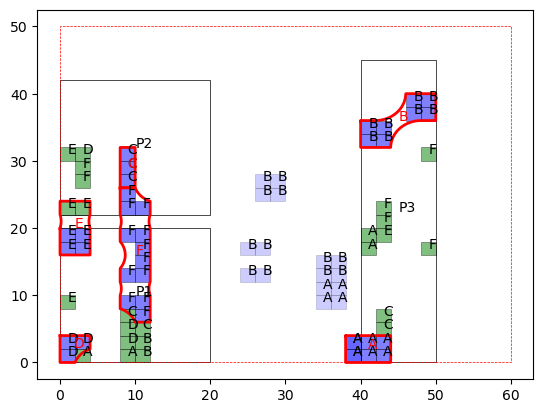

In [1271]:
map.remove(parcel_dissolve)
map.add_gdf(parcel_dissolve_merge, alpha=0, edgecolor='red', label='OWNER', label_color='red', linewidth=2)
map.plot()

### Rural Parcel Clustering

In [1272]:
all_rural_clustered_parcel_data = gpd.GeoDataFrame()
all_rural_single_parcel_data = gpd.GeoDataFrame()

In [1273]:
# find parcels not within a place boundary
rural_parcels = parcels[~parcels.within(place_gdf.unary_union)]
unique_rural_owners = rural_parcels['OWNER'].unique()
print('Unique rural owners: ', unique_rural_owners)
rural_place_id = 99


Unique rural owners:  ['A' 'B']


In [1274]:
unique_rural_owners = rural_parcels['OWNER'].unique()
rural_single_parcel_data = gpd.GeoDataFrame()
rural_clustered_parcel_data = gpd.GeoDataFrame()
for owner in unique_rural_owners:
    print(f"Processing owner {owner}")
    owner_parcels = rural_parcels[rural_parcels['OWNER'] == owner]
                
    clusters = build_owner_clusters(
        owner_parcels,
        min_samples=min_cluster_size,
        eps=rural_distance
    )
    
    if len(clusters) == 0: # EMPTY: NO CLUSTERS
        print(f'Owner {owner} has less than 2 parcels')
        rural_single_parcel_data = pd.concat([rural_single_parcel_data, owner_parcels], ignore_index=True)  
        rural_single_parcel_data = add_attributes(
            rural_single_parcel_data,
            place_id=place_id,
            )
        continue

    owner_parcels['cluster'] = clusters # cluster ID
    owner_parcels['area'] = owner_parcels['geometry'].area
    counts = owner_parcels['cluster'].value_counts() # pd.series of cluster counts

    outlier_ids, clean_counts = segregate_outliers(counts, -1)

    add_to_singles = locate_in_df(owner_parcels, outlier_ids, 'cluster')
    add_to_singles = add_to_singles.drop(columns=['cluster', 'area'])
    rural_single_parcel_data = pd.concat([rural_single_parcel_data, add_to_singles], ignore_index=True)

    if len(rural_single_parcel_data) > 0:
        rural_single_parcel_data = add_attributes(
            rural_single_parcel_data,
            place_id=rural_place_id,
        )
    
    
    cluster_filter = remove_from_df(owner_parcels, outlier_ids, 'cluster')
    if len(cluster_filter) > 0:
        cluster_filter = add_attributes(
            cluster_filter,
            pcount=cluster_filter['cluster'].map(counts),
            knn_dst=rural_distance,
            place_id=rural_place_id
        )
        rural_clustered_parcel_data = pd.concat([rural_clustered_parcel_data, cluster_filter], ignore_index=True)
    
# create cluster ID
if len(rural_clustered_parcel_data) != 0:
    cluster_string = generate_cluster_string([str(rural_place_id), str(region)])
    
    rural_clustered_parcel_data['cluster_ID'] = (
        rural_clustered_parcel_data['OWNER'] + '_' +
        cluster_string + '_' + 
        rural_clustered_parcel_data['cluster'].astype(str)
    )

if len(rural_single_parcel_data) != 0:
    cluster_string = generate_cluster_string([str(rural_place_id), str(region), 'X'])

    rural_single_parcel_data['cluster_ID'] = (
        rural_single_parcel_data['OWNER'] + '_' +
        cluster_string
    )
print('________________________________')
        
all_rural_clustered_parcel_data = pd.concat([all_rural_clustered_parcel_data, rural_clustered_parcel_data], ignore_index=True)
all_rural_single_parcel_data = pd.concat([all_rural_single_parcel_data, rural_single_parcel_data], ignore_index=True)


Processing owner A
Processing owner B
________________________________


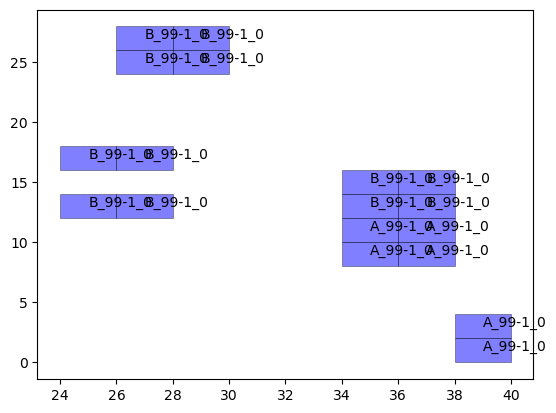

In [1277]:
rural_map = Map()
rural_map.add_gdf(all_rural_clustered_parcel_data, label='cluster_ID', color='blue')
rural_map.plot()

In [1278]:
all_clustered_parcel_data_wrural = pd.concat([all_clustered_parcel_data, all_rural_clustered_parcel_data], ignore_index=True)
all_single_parcel_data_wrural = pd.concat([all_single_parcel_data, all_rural_single_parcel_data], ignore_index=True)

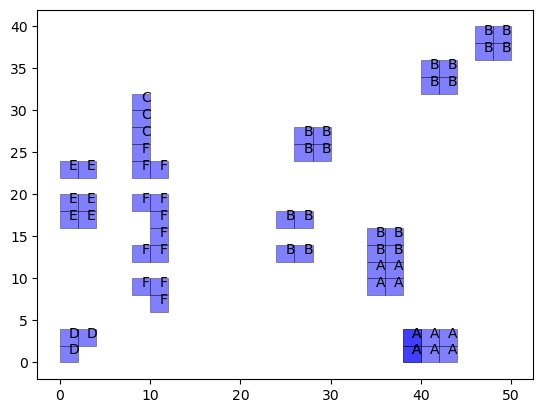

In [1279]:
new_map = Map()
new_map.add_gdf(all_clustered_parcel_data_wrural, label='OWNER', color='blue')
new_map.plot()

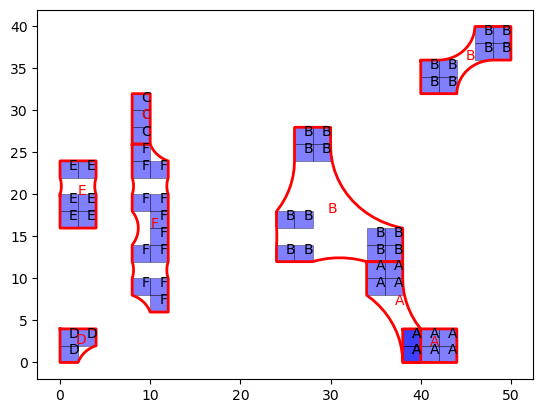

In [1280]:
all_clustered_parcel_data_wrural = all_clustered_parcel_data_wrural.dissolve(by='cluster_ID').reset_index()
all_clustered_parcel_data_wrural['geometry'] = all_clustered_parcel_data_wrural.apply(lambda x: x['geometry'].buffer(x['knn_dst']), axis=1)
all_clustered_parcel_data_wrural['geometry'] = all_clustered_parcel_data_wrural.apply(lambda x: x['geometry'].buffer(-x['knn_dst']), axis=1)

new_map.add_gdf(all_clustered_parcel_data_wrural, alpha=0, edgecolor='red', label='OWNER', label_color='red', linewidth=2)
new_map.plot()



In [1281]:
all_clustered_parcel_data_merged_wrural = merge_cross_region_clusters(
    all_clustered_parcel_data_wrural, 
    max_merge_distance=5
)


place_id  1.0   2.0   3.0   99.0
OWNER                           
A            0     0     1     1
B            0     0     1     1
C            0     1     0     0
D            1     0     0     0
E            1     0     0     0
F            1     0     0     0
Index(['A', 'B'], dtype='object', name='OWNER')


In [1282]:
all_clustered_parcel_data_merged_wrural

,cluster_ID,geometry,index,OWNER,cluster,area,pcount,knn_dst,place_id
0,A_3-2_0,"POLYGON ((38 3.91619, 38.00392 3.99608, 38.083...",22.0,A,0.0,4.0,6.0,3.414214,3.0
1,A_99-1_0,"POLYGON ((34.0115 11.9885, 34.24549 12, 37.754...",NaN,A,0.0,4.0,6.0,10.000000,99.0
2,B_3-1_0,"POLYGON ((40 35.90054, 40.00466 35.99534, 40.0...",28.0,B,0.0,4.0,8.0,4.051596,3.0
3,B_99-1_0,"POLYGON ((24 17.75451, 24.01185 17.99576, 24.0...",NaN,B,0.0,4.0,12.0,10.000000,99.0
4,C_2-1_0,"POLYGON ((8.00379 26.00379, 8 26.08094, 8 31.9...",19.0,C,0.0,4.0,3.0,3.297056,2.0
5,D_1-2_0,"POLYGON ((0.00379 3.99621, 0.08094 4, 3.91906 ...",0.0,D,0.0,4.0,3.0,3.297056,1.0
6,E_1-1_0,"POLYGON ((0 19.91619, 0.00409 19.99939, 0.0427...",6.0,E,0.0,4.0,4.0,3.414214,1.0
7,F_1-0_0,"POLYGON ((8 25.91906, 8.00379 25.99621, 8.0809...",3.0,F,0.0,4.0,3.0,3.297056,1.0


In [1283]:
new_map.remove(all_clustered_parcel_data_wrural)

In [1284]:
final_parcel_dissolve = all_clustered_parcel_data_merged_wrural.dissolve(by='cluster_ID').reset_index()


In [1285]:
final_parcel_dissolve['geometry'] = final_parcel_dissolve.apply(lambda x: x['geometry'].buffer(x['knn_dst']), axis=1)
final_parcel_dissolve['geometry'] = final_parcel_dissolve.apply(lambda x: x['geometry'].buffer(-x['knn_dst']), axis=1)


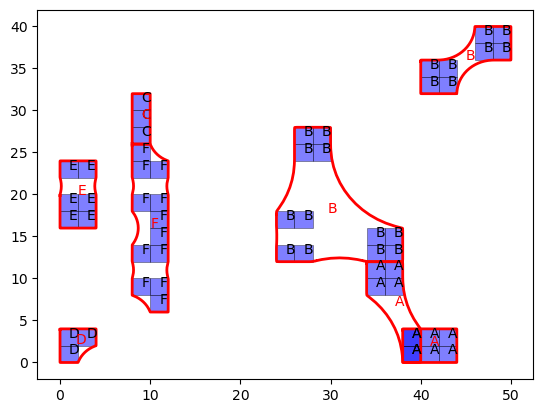

In [1286]:
new_map.add_gdf(final_parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red', linewidth=2)
new_map.plot()